In [174]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [175]:
# Load the CSV file into a pandas DataFrame
dataset = pd.read_csv("original_data.txt", delimiter='\t', low_memory=False)

In [176]:

# Replace '.' with 0 in the entire DataFrame
dataset.replace('.', 0, inplace=True)

# For Column FGRStrand
dataset.replace('+', 1, inplace=True)
dataset.replace('-', -1, inplace=True)

# Remove the prefix from column 'peakName'
dataset['peakName'] = dataset['peakName'].str.replace('chm13v2_accessible_region_', '', regex=False)

# Get unique values from the 'region' column and create a map string:index
region_dict = {region: index for index, region in enumerate(dataset['region'].unique())}

# Print the dictionary of unique regions and their indices
print("Unique regions and their assigned indices:")
print(region_dict)

# # Replace the strings in the 'region' column with their corresponding indices
dataset['region'] = dataset['region'].map(region_dict)

# Dropping 'FGR' 'cause it seems that it has weird data
dataset = dataset.drop(columns=['FGR'])

Unique regions and their assigned indices:
{'promoter': 0, 'enhancer': 1, 'divergent': 2, 'geneBody': 3, 'CPS': 4, 'TW': 5, 'untranscribed': 6}


In [177]:
#These are the columns NOT linked to a protein
print(dataset.columns[:10])

Index(['chr', 'peakStart', 'peakEnd', 'peakName', 'peakScore', 'FGRstart',
       'FGRend', 'FGRstrand', 'region', 'K562_AFF1_ENCSR241LIH'],
      dtype='object')


25
{'chr1': 13721, 'chr2': 9499, 'chr7': 8304, 'chr6': 7903, 'chr3': 6790, 'chr5': 6511, 'chr11': 5939, 'chr10': 5083, 'chr8': 5051, 'chr12': 5047, 'chr4': 4882, 'chr19': 4284, 'chr9': 3964, 'chr17': 3758, 'chr15': 3638, 'chr16': 3438, 'chrX': 3017, 'chr14': 2711, 'chr22': 2328, 'chr20': 2315, 'chr13': 2192, 'chr18': 1946, 'chr21': 1582, 'chrY': 95, 'chrM': 6}


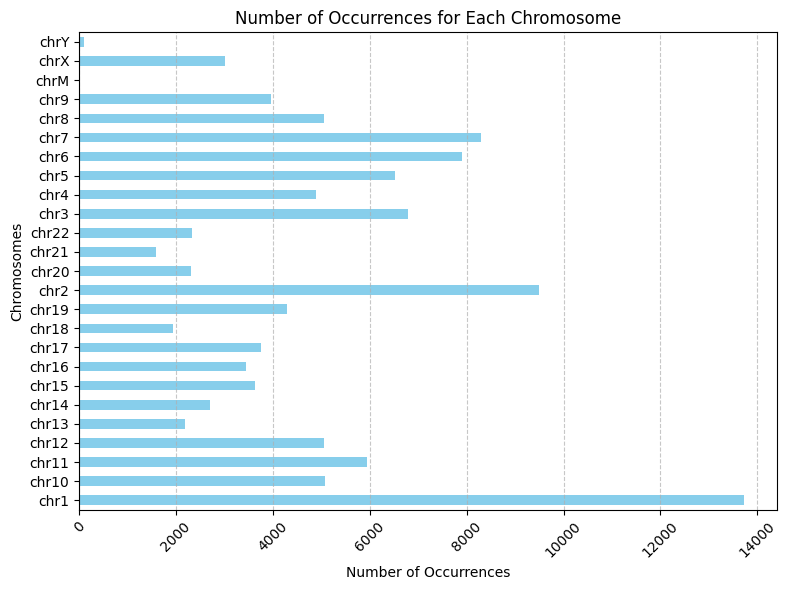

In [178]:
print(len(dataset['chr'].unique()))


dataset['chr'].unique()

# Count occurrences of each chromosome
occurrences = dataset['chr'].value_counts()

# Create a dictionary (optional, since value_counts() returns a Series)
occurrences_dict = occurrences.to_dict()

# Print the dictionary
print(occurrences_dict)

# Plotting the histogram
plt.figure(figsize=(8, 6))
occurrences.sort_index().plot(kind='barh', color='skyblue')  # Horizontal bar plot
plt.xlabel('Number of Occurrences')
plt.ylabel('Chromosomes')
plt.title('Number of Occurrences for Each Chromosome')
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [179]:

# Extract column names from the 11th column to the last
protein_run_set = dataset.columns[10:]
print(protein_run_set)

# Extract the protein names (second part of the string) using a list comprehension
proteins = list([col.split('_')[1] for col in protein_run_set])


# Count occurrences of each unique protein
protein_count = Counter(proteins)

# Convert to a regular dictionary if needed
protein_count_dict = dict(protein_count)

# Print the counts
print(protein_count_dict)

# Create a dictionary of proteins that occur more than once
proteins_more_than_once = {protein: count for protein, count in protein_count.items() if count > 1}

# Print the result
print(proteins_more_than_once)

Index(['K562_AFF1_ENCSR426URK', 'K562_AGO1_ENCSR641BSL',
       'K562_ARHGAP35_ENCSR571BUF', 'K562_ARID1B_ENCSR822CCM',
       'K562_ARID2_ENCSR491EBY', 'K562_ARNT_ENCSR155KHM',
       'K562_ARNT_ENCSR613NUC', 'K562_ARNT_ENCSR669NFS',
       'K562_ASH1L_ENCSR115BBC', 'K562_ATACseq',
       ...
       'K562_ZNF384_ENCSR000EFP', 'K562_ZNF407_ENCSR011NOZ',
       'K562_ZNF407_ENCSR439OCL', 'K562_ZNF592_ENCSR249BHQ',
       'K562_ZNF639_ENCSR497VFH', 'K562_ZNF639_ENCSR949NVY',
       'K562_ZNF830_ENCSR033NQK', 'K562_ZNF830_ENCSR851XLW',
       'K562_ZSCAN29_ENCSR175SZH', 'K562_ZSCAN29_ENCSR635EXI'],
      dtype='object', length=449)
{'AFF1': 1, 'AGO1': 1, 'ARHGAP35': 1, 'ARID1B': 1, 'ARID2': 1, 'ARNT': 3, 'ASH1L': 1, 'ATACseq': 1, 'ATF1': 1, 'ATF2': 1, 'ATF3': 3, 'ATF4': 1, 'ATF7': 1, 'BACH1': 1, 'BCLAF1': 2, 'BCOR': 1, 'BDP1': 1, 'BHLHE40': 1, 'BMI1': 1, 'BRCA1': 1, 'BRD4': 1, 'BRD9': 1, 'BRF1': 1, 'BRF2': 1, 'C11orf30': 1, 'CBFA2T2': 1, 'CBFA2T3': 1, 'CBX1': 1, 'CBX2': 1, 'CBX3': 2, 'CBX

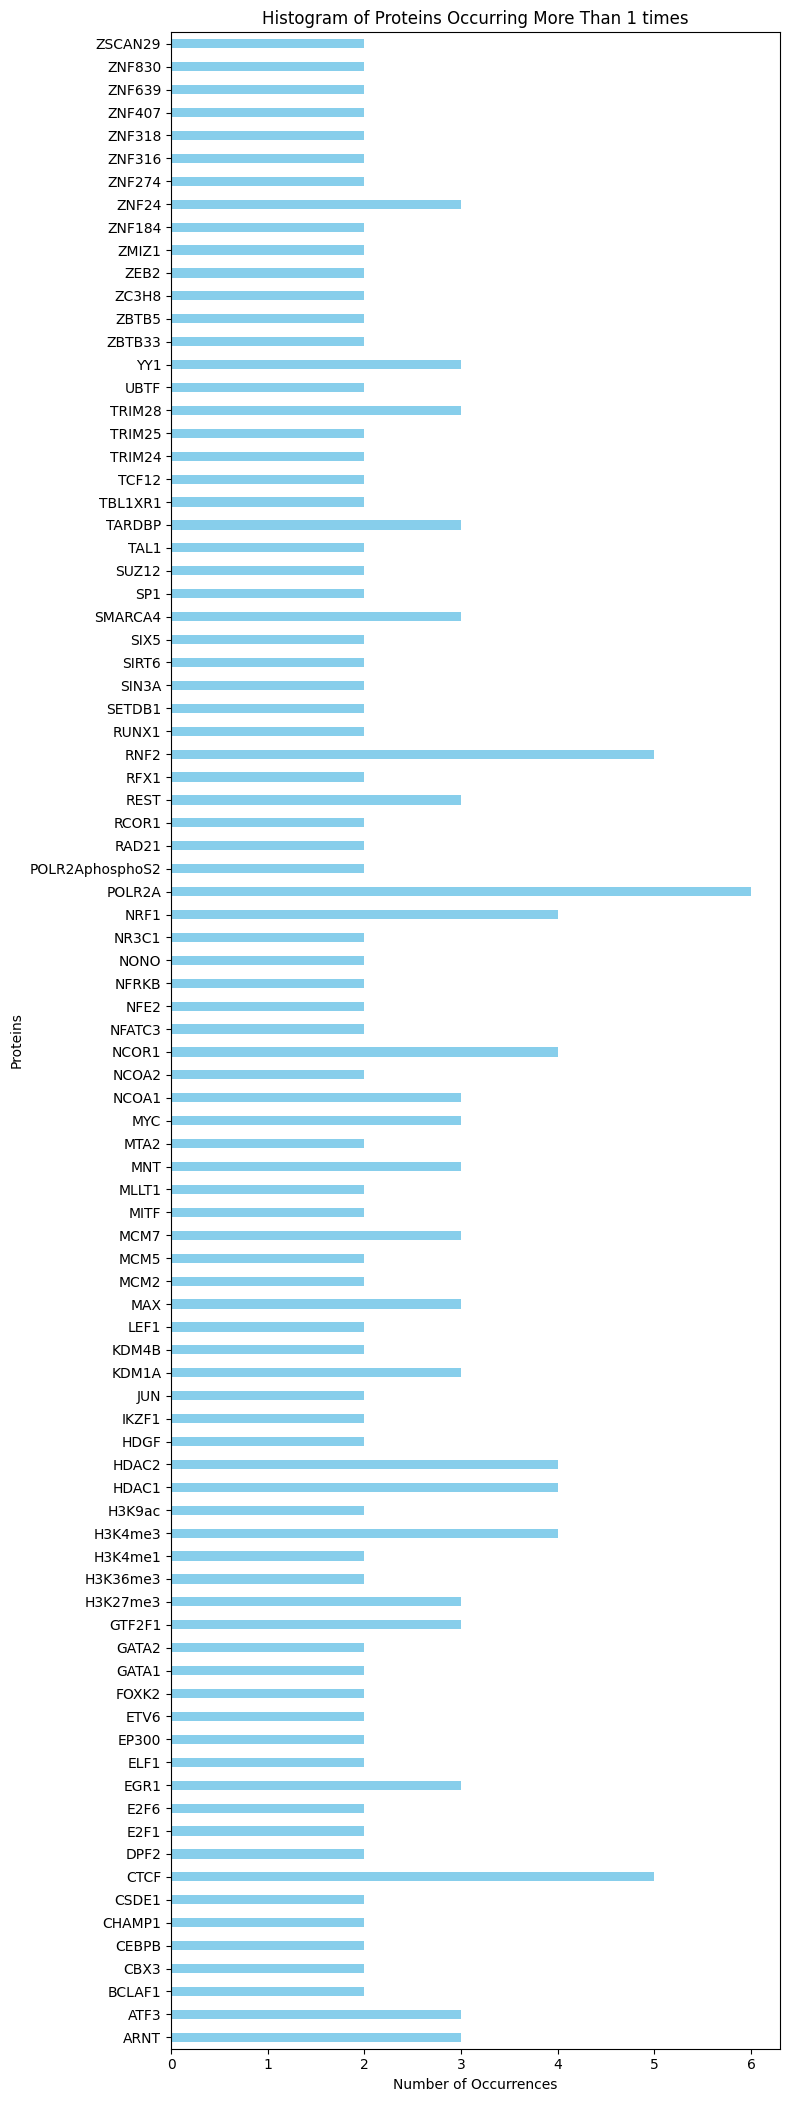

There are 88 unique proteins that occur more than 1 times


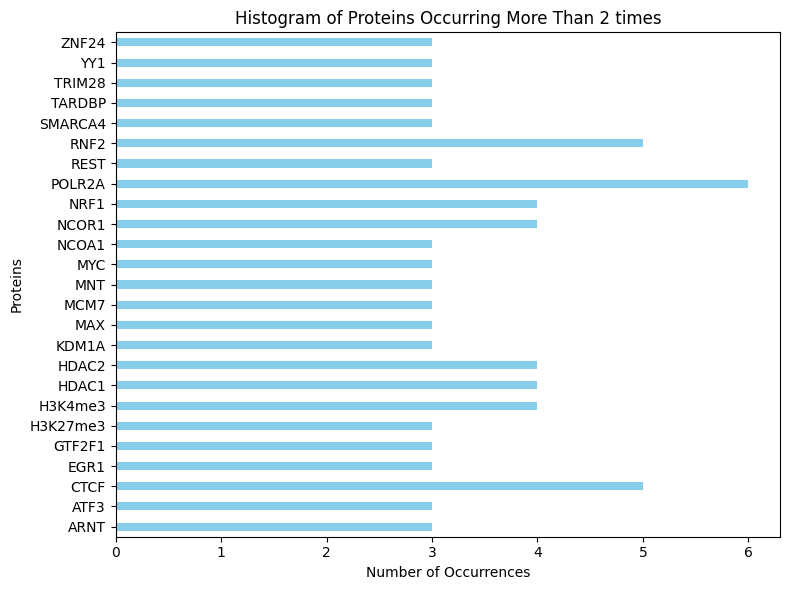

There are 25 unique proteins that occur more than 2 times


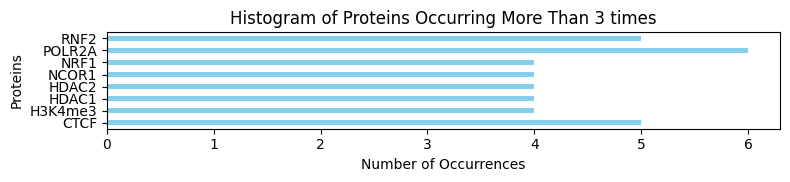

There are 8 unique proteins that occur more than 3 times


In [180]:



def plot_protein_histogram(proteins, bar_width=0.4):
    # Count occurrences of each unique protein
    protein_count = Counter(proteins)

    # Create a dictionary of proteins that occur more than once
    dict_list = []
    for i in [1, 2, 3]:
        dict_list.append({protein: count for protein, count in protein_count.items() if count > i})
        filename = f"proteins_occ_more_than_{i}.png"

        # Set up the figure with the specified size
        num_proteins = len(dict_list[i-1])
        plt.figure(figsize=(8, num_proteins * bar_width * 0.6))  # Adjust the height based on number of proteins

        # Create the histogram (note the order of x and y)
        plt.barh(list(dict_list[i-1].keys()), list(dict_list[i-1].values()), color='skyblue', height=bar_width)

        # Add labels and title
        plt.ylabel('Proteins')
        plt.xlabel('Number of Occurrences')
        plt.title(f'Histogram of Proteins Occurring More Than {i} times')
        plt.ylim(-0.5, num_proteins - 0.5)  # Adjust the limits to remove extra space

        # Save the plot as a PNG file
        plt.tight_layout()  # Adjust layout to fit labels
        plt.savefig(filename)  # Save the figure
        plt.show()
        plt.close()  # Close the plot to free up memory

        print(f'There are {len(dict_list[i-1])} unique proteins that occur more than {i} times')



plot_protein_histogram(proteins)

In [181]:
# Listing proteins that occur only once (less than 2 times)
less_than_2 = {protein: count for protein, count in protein_count.items() if count < 2}
print(len(less_than_2))

236


In [182]:
# Creating a copy of the dataset that only keeps proteins that occur more than once

dataset_more_than_1 = dataset
print(f'Original #Columns: {dataset_more_than_1.shape[1]}')

for protein in less_than_2:
    columns_to_drop = dataset_more_than_1.filter(like=f'{protein}').columns
    dataset_more_than_1.drop(columns=columns_to_drop, inplace=True)

print(f'Final #Columns: {dataset_more_than_1.shape[1]}')

Original #Columns: 459
Final #Columns: 222


In [205]:
highest_peak_score = dataset_more_than_1['peakScore'].max()
print(highest_peak_score)

lowest_peak_score = dataset_more_than_1['peakScore'].min()
print(lowest_peak_score)

mean_peak_score = dataset_more_than_1['peakScore'].mean()
print(mean_peak_score)

stdv_peak_score = dataset_more_than_1['peakScore'].std()
print(stdv_peak_score)


# Define the bounds for peakScore within 3 standard deviations
threshold = 1
lower_bound = mean_peak_score - threshold * stdv_peak_score
upper_bound = mean_peak_score + threshold * stdv_peak_score

# Filter the dataset to keep only the rows within these bounds
filtered_dataset = dataset_more_than_1[(dataset_more_than_1['peakScore'] >= lower_bound) & (dataset_more_than_1['peakScore'] <= upper_bound)]

print(f'Dataset reduced from {dataset_more_than_1.shape[0]} to {filtered_dataset.shape[0]} rows')
print(f'That reduction means that ~{int(100*filtered_dataset.shape[0]/dataset_more_than_1.shape[0])}% of the data has been kept')

104617
13
173.66813445142276
476.5506540575115
Dataset reduced from 114004 to 108198 rows
That reduction means that ~94% of the data has been kept


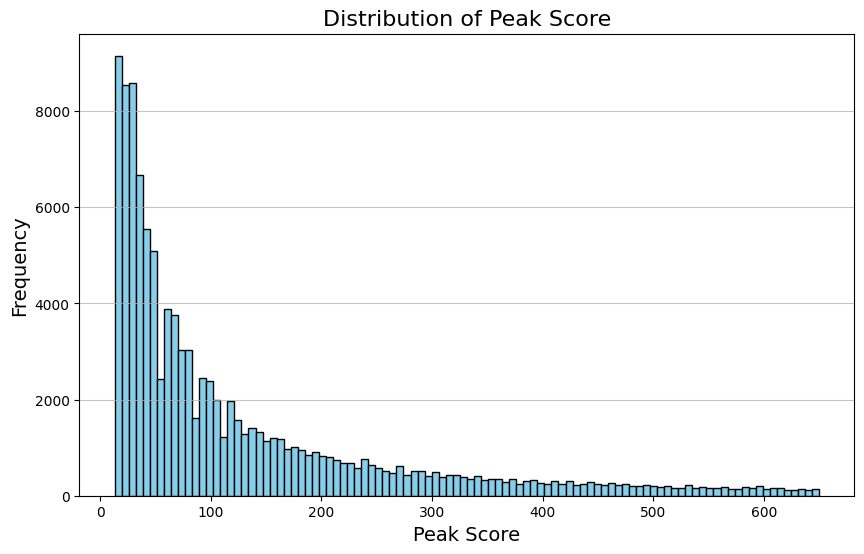

In [207]:
# Plot the histogram of the 'peakScore' column
plt.figure(figsize=(10, 6))
plt.hist(filtered_dataset['peakScore'], bins=100, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Peak Score', fontsize=16)
plt.xlabel('Peak Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.grid(axis='y', alpha=0.75)
plt.show()



In [213]:
ix = 1000
filtered_dataset.iloc[ix:ix+10,0:15]

,chr,peakStart,peakEnd,peakName,peakScore,FGRstart,FGRend,FGRstrand,region,K562_ARNT_ENCSR155KHM,K562_ARNT_ENCSR613NUC,K562_ARNT_ENCSR669NFS,K562_ATF3_ENCSR000BNU,K562_ATF3_ENCSR000DOG,K562_ATF3_ENCSR028UIU
1580,chr10,32407610,32408336,1581,497,32407624,32408123,-1,0,49,0,0,0,0,0
1582,chr10,32972840,32973060,1583,60,32972750,32973249,1,0,0,0,0,0,0,0
1584,chr10,34843520,34843808,1585,35,34843590,34844089,-1,0,0,0,0,0,0,0
1585,chr10,35118218,35119731,1586,597,35118928,35119427,-1,0,85,0,0,0,0,0
1586,chr10,35154812,35156336,1587,506,35155319,35155818,1,0,38,0,0,59,0,0
1587,chr10,35223631,35225067,1588,427,35224247,35224746,1,0,0,0,0,56,0,0
1588,chr10,35364434,35366142,1589,185,35364858,35365357,1,0,52,0,0,0,0,0
1589,chr10,35633823,35634184,1590,43,35633533,35634032,1,0,0,0,0,0,0,0
1590,chr10,35671067,35672877,1591,472,35672202,35672701,-1,0,0,0,0,0,0,0
1593,chr10,38137987,38139187,1594,616,38138068,38138567,1,0,171,0,0,76,0,0


In [222]:
# Count occurrences of value 497 in 'peakScore' column

value = 0
count_value = filtered_dataset['peakScore'].value_counts().get(value, 0)

print(f"Occurrences of {value} in peakScore:", count_value)


Occurrences of 0 in peakScore: 0


In [228]:
filtered_dataset.shape
lala = filtered_dataset['peakScore'].unique()
lala.shape

(638,)